In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import igraph as ig
import networkx as nx
import leidenalg as la
from operator import itemgetter
path_files = "C:/Users/gianl/Desktop/Gi/Supsi/Vaccines_Discussion_Italy/Laura/Files/"

In [2]:
deg = pd.read_csv(path_files + "degree.csv")
louvain = pd.read_csv(path_files + "louvain.csv")
leiden = pd.read_csv(path_files + "leiden.csv")
leiden

,user,community
0,planetpaul65,0
1,isentinelli,0
2,Grace_1207,7
3,LidaSezOlbia,7
4,MarisaMinervini,1
...,...,...
216211,legatumori_to,101
216212,ExmoorOn,3
216213,Dado46544020,0
216214,BernardMalcom2,3


In [6]:
deg

,user,degree
0,RobertoBurioni,20063
1,CottarelliCPI,7527
2,Cartabellotta,5224
3,valy_s,4939
4,Agenzia_Ansa,4918
...,...,...
216211,legatumori_to,1
216212,ExmoorOn,1
216213,Dado46544020,1
216214,BernardMalcom2,1


In [3]:
df = louvain.merge(deg, left_on="name", right_on="user", how="left")[["name", "community", "degree"]]
df2 = leiden.merge(deg, left_on="user", right_on="user", how="left")[["user", "community", "degree"]]

Le prime 10 community contengono il 91.77% degli utenti


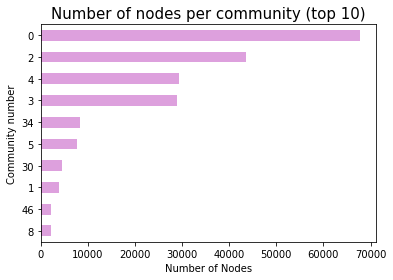

In [4]:
val = pd.Series(louvain["community"]).value_counts().sort_values(ascending=False)
total = 0
for i in val[:10]:
    total = total + i
print(f"Le prime 10 community contengono il {round(total/len(louvain)*100,2)}% degli utenti")
fig = plt.figure() #figsize=(14, 8)
ax = val[:10].plot(kind='barh', color='plum', fig=(14,14)) #orange #lightseagreen
ax.set_title('Number of nodes per community (top 10)', fontsize=15)
ax.invert_yaxis()
ax.set_ylabel("Community number")
ax.set_xlabel("Number of Nodes")
plt.show()

In [5]:
df.sort_values(by=["degree"], ascending=False, inplace=True)
comm_0 = list(df[df["community"]==0]["name"])
comm_2 = list(df[df["community"]==2]["name"])
comm_4 = list(df[df["community"]==4]["name"])
comm_3 = list(df[df["community"]==3]["name"])
cont = 0
value = 15

print("Community 0:")
for item in comm_0:
    print(item)
    if cont == value:
        break
    cont+=1
cont = 0
print("-----------")
print("Community 2:")
for item in comm_2:
    print(item)
    if cont == value:
        break
    cont += 1
cont = 0
print("-----------")
print("Community 4:")
for item in comm_4:
    print(item)
    if cont == 30:
        break
    cont += 1
cont = 0
print("-----------")
print("Community 3:")
for item in comm_3:
    print(item)
    if cont == value:
        break
    cont += 1
cont = 0

Community 0:
RobertoBurioni
CottarelliCPI
Cartabellotta
lucianocapone
Quirinale
GiacomoGorini
robersperanza
jacopo_iacoboni
GassmanGassmann
HuffPostItalia
antonellaviol17
chetempochefa
Iperbole_
matteorenzi
carloalberto
riotta
-----------
Community 2:
MicheleMazzell5
gloquenzi
lercionotizie
Zziagenio78
holyernia
bernaftaustin
Dio
Vivianabillo
Barbaramenteme
Tremenoventi
demonscamealive
felice_chi
sempreciro
yleniaindenial
LaBiaBi11
amaricord
-----------
Community 4:
valy_s
pbecchi
intuslegens
MinervaMcGrani1
a_meluzzi
RadioSavana
ImolaOggi
BarbaraRaval
noitre32
ladyonorato
borghi_claudio
miia_2018
cris_cersei
TarroGiulio
byoblu
fdragoni
BarillariDav
matteosalvinimi
FmMosca
GuidoCrosetto
NicolaPorro
francescatotolo
LaVeritaWeb
Mr_Ozymandias
25O319
lameduck1960
MinutemanItaly
Libero_official
barbarab1974
EliseiNicole
Yi_Benevolence
-----------
Community 3:
Agenzia_Ansa
Corriere
repubblica
fattoquotidiano
SkyTG24
Adnkronos
ultimenotizie
GiuseppeConteIT
stanzaselvaggia
La7tv
sole24ore
TgLa

In [6]:
df2.sort_values(by=["degree"], ascending=False, inplace=True)
comm_0 = list(df2[df2["community"]==0]["user"])
comm_2 = list(df2[df2["community"]==1]["user"])
comm_4 = list(df2[df2["community"]==2]["user"])
comm_3 = list(df2[df2["community"]==3]["user"])
cont = 0
value = 15

print("Community 0:")
for item in comm_0:
    print(item)
    if cont == value:
        break
    cont+=1
cont = 0
print("-----------")
print("Community 2:")
for item in comm_2:
    print(item)
    if cont == value:
        break
    cont += 1
cont = 0
print("-----------")
print("Community 4:")
for item in comm_4:
    print(item)
    if cont == 30:
        break
    cont += 1
cont = 0
print("-----------")
print("Community 3:")
for item in comm_3:
    print(item)
    if cont == value:
        break
    cont += 1
cont = 0

Community 0:
RobertoBurioni
CottarelliCPI
Cartabellotta
lucianocapone
Quirinale
GiacomoGorini
robersperanza
jacopo_iacoboni
GassmanGassmann
antonellaviol17
chetempochefa
gloquenzi
Iperbole_
matteorenzi
carloalberto
lercionotizie
-----------
Community 2:
lefrasidiosho
MicheleMazzell5
Zziagenio78
holyernia
bernaftaustin
Vivianabillo
Barbaramenteme
Tremenoventi
demonscamealive
felice_chi
sempreciro
yleniaindenial
LaBiaBi11
amaricord
cremino01
perchetendenza
-----------
Community 4:
valy_s
pbecchi
intuslegens
MinervaMcGrani1
a_meluzzi
RadioSavana
ImolaOggi
BarbaraRaval
noitre32
ladyonorato
borghi_claudio
miia_2018
cris_cersei
TarroGiulio
byoblu
fdragoni
BarillariDav
matteosalvinimi
FmMosca
GuidoCrosetto
NicolaPorro
francescatotolo
LaVeritaWeb
Mr_Ozymandias
25O319
lameduck1960
MinutemanItaly
Libero_official
barbarab1974
EliseiNicole
Yi_Benevolence
-----------
Community 3:
Agenzia_Ansa
Corriere
repubblica
HuffPostItalia
SkyTG24
Adnkronos
ultimenotizie
La7tv
sole24ore
TgLa7
MediasetTgcom24
La

In [35]:
df[df["name"]=="ZioKlint"]

,name,community,degree
1854,ZioKlint,4,1230


In [62]:
x = df2[df2["community"]==2]
print(np.mean(list(x["degree"])))
for i in x.itertuples():
    if i.user == "gallina_di":
        print(i.user)
        print(i.degree)

38.86718971882988


In [162]:
x = df[df["degree"]>20][["name"]]
# .to_csv(r"C:\Users\gianl\Desktop\Gi\Supsi\Vaccines_Discussion_Italy\Laura\Files\to_follow.csv",
#                                      line_terminator="\n", encoding="utf-8", index=False)
x

,name
0,planetpaul65
1,isentinelli
2,Grace_1207
3,LidaSezOlbia
5,milio967
...,...
213767,DavideGabriell7
214363,GPDP_IT
214731,Alice__why
214844,NiusMarco
